In [3]:
#Title Name: Predictive Maintenance for Electrical Equipment
#Batch Member Name: Gayatri Dongre, Khushi Jagwani, Aditya Gupta, Ankit Kamdi
#Batch No 9

In [4]:
!pip install packages

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\MY\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 1.Importing Python Packages

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns 

In [6]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\MY\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 2.Data Collection

In [7]:
df = pd.read_csv(r'E:\predictive_maintenance_data_10K (1).csv')

## 3.Data Exploration
1) Summary of the data set

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


2) Display of First Few Records

In [9]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


3) Display of Last Few Records

In [10]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


3) Descriptive statistcs


In [11]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.034800
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.183282
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


4) Finding the Missing values

In [12]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

5. Finding the Dirty data

In [13]:
df = pd.DataFrame(df)

col_name = df.columns
print("ColumnName: \n", col_name)

ColumnName: 
 Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


In [14]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

6) Find the Outliers

In [15]:
z_scores_air_temperature = stats.zscore(df['Air temperature [K]'])

In [16]:
outliers_air_temperature = df[abs(z_scores_air_temperature) > 3]

In [17]:
print(df['Air temperature [K]'])


0       298.1
1       298.2
2       298.1
3       298.2
4       298.2
        ...  
9995    298.8
9996    298.9
9997    299.0
9998    299.0
9999    299.0
Name: Air temperature [K], Length: 10000, dtype: float64


In [18]:
outliers_air_temperature = df[abs(z_scores_air_temperature) >2]


In [19]:
print(z_scores_air_temperature)


0      -0.952389
1      -0.902393
2      -0.952389
3      -0.902393
4      -0.902393
          ...   
9995   -0.602417
9996   -0.552421
9997   -0.502425
9998   -0.502425
9999   -0.502425
Name: Air temperature [K], Length: 10000, dtype: float64


In [20]:
print(outliers_air_temperature)

       UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
863    864     L48043    L                296.0                    306.7   
864    865     M15724    M                296.0                    306.7   
865    866     L48045    L                295.9                    306.6   
866    867     L48046    L                295.9                    306.6   
867    868     H30281    H                295.9                    306.5   
...    ...        ...  ...                  ...                      ...   
5173  5174     M20033    M                304.2                    313.5   
5174  5175     M20034    M                304.2                    313.5   
5175  5176     L52355    L                304.2                    313.4   
5189  5190     M20049    M                304.1                    313.2   
5190  5191     L52370    L                304.1                    313.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
863              

In [21]:
z_scores = stats.zscore(df['Air temperature [K]'])

In [22]:
threshold = 1

In [23]:
outliers_air_temperature = df[abs(z_scores) > threshold]

In [24]:
print(outliers_air_temperature)

       UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
237    238     M15097    M                298.0                    308.1   
238    239     L47418    L                297.9                    308.1   
239    240     L47419    L                298.0                    308.2   
240    241     M15100    M                298.0                    308.1   
241    242     L47421    L                298.0                    308.1   
...    ...        ...  ...                  ...                      ...   
9436  9437     L56616    L                298.0                    308.6   
9443  9444     H38857    H                298.0                    308.8   
9450  9451     M24310    M                298.0                    308.7   
9451  9452     H38865    H                298.0                    308.7   
9452  9453     M24312    M                298.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
237              

# TASK 2. EXPLORATORY DATA ANALYSIS (EDA)

1. Handling missing value

In [25]:
missing_value = df.isnull().sum()
print("missing value:\n", missing_value)

missing value:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [26]:
print(df.dtypes)      # to check the data types of the columns

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object


In [27]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


In [28]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.034800
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.183282
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [29]:
df.isna()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [30]:
df.notna()  

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True


In [31]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [32]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [33]:
## drop UDI and Product ID columns
columns = ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type']
df = pd.DataFrame(df, columns=columns)
columns_to_drop = ['UDI', 'Product ID',]  
df = df.drop(columns=columns_to_drop)
print(df.head())

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure  


In [34]:
df = pd.DataFrame(df)
df.loc[1, 'Air temperature [K]'] = np.nan
df.loc[3, 'Process temperature [K]'] = np.nan
df.loc[2, 'Rotational speed [rpm]'] = np.nan
df.loc[4, 'Torque [Nm]'] = np.nan


In [35]:
print("DataFrame with Missing Values:")
print(df)

DataFrame with Missing Values:
     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                  NaN                    308.7   
2       L                298.1                    308.5   
3       L                298.2                      NaN   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                     1551.0         42.8                0       0   
1                     1408.0         46.3                3       0   
2                        NaN         49.4         

In [36]:
df.isna().sum()

Type                       0
Air temperature [K]        1
Process temperature [K]    1
Rotational speed [rpm]     1
Torque [Nm]                1
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [37]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(df)

     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       M                298.1                    308.6   
2       L                298.1                    308.6   
3       L                298.1                    308.6   
4       M                298.3                    308.7   
...   ...                  ...                      ...   
9991    M                298.8                    308.4   
9992    H                298.9                    308.4   
9993    M                299.0                    308.6   
9994    H                299.0                    308.7   
9995    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                     1551.0         42.8                0       0   
1                     1425.0         41.9               11       0   
2                     1558.0         42.4               14       0   
3          

In [38]:
constant_value = -999
df.fillna(constant_value, inplace=True)
print(df)

     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       M                298.1                    308.6   
2       L                298.1                    308.6   
3       L                298.1                    308.6   
4       M                298.3                    308.7   
...   ...                  ...                      ...   
9991    M                298.8                    308.4   
9992    H                298.9                    308.4   
9993    M                299.0                    308.6   
9994    H                299.0                    308.7   
9995    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                     1551.0         42.8                0       0   
1                     1425.0         41.9               11       0   
2                     1558.0         42.4               14       0   
3          

In [39]:
numeric_columns = df.select_dtypes(include=['number']).columns
mean_imputed_df = df.copy()
mean_imputed_df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [40]:
print("Mean Imputation:")

Mean Imputation:


In [41]:
print(mean_imputed_df)

     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       M                298.1                    308.6   
2       L                298.1                    308.6   
3       L                298.1                    308.6   
4       M                298.3                    308.7   
...   ...                  ...                      ...   
9991    M                298.8                    308.4   
9992    H                298.9                    308.4   
9993    M                299.0                    308.6   
9994    H                299.0                    308.7   
9995    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                     1551.0         42.8                0       0   
1                     1425.0         41.9               11       0   
2                     1558.0         42.4               14       0   
3          

In [42]:
missing_indicators = df.isnull().astype(int)
df_with_indicators = pd.concat([df, missing_indicators.add_suffix('_missing')], axis=1)
print(df_with_indicators)

     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       M                298.1                    308.6   
2       L                298.1                    308.6   
3       L                298.1                    308.6   
4       M                298.3                    308.7   
...   ...                  ...                      ...   
9991    M                298.8                    308.4   
9992    H                298.9                    308.4   
9993    M                299.0                    308.6   
9994    H                299.0                    308.7   
9995    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                     1551.0         42.8                0       0   
1                     1425.0         41.9               11       0   
2                     1558.0         42.4               14       0   
3          

In [43]:
print('outliers')

outliers


In [44]:
z_scores_air_temperature = stats.zscore(df['Air temperature [K]'])
filtered_entries = (abs(z_scores_air_temperature) < 2) 
df_filtered = df[filtered_entries]

In [45]:
print(z_scores_air_temperature)

0      -0.952725
1      -0.952725
2      -0.952725
3      -0.952725
4      -0.852736
          ...   
9991   -0.602764
9992   -0.552769
9993   -0.502775
9994   -0.502775
9995   -0.502775
Name: Air temperature [K], Length: 9996, dtype: float64


In [46]:
print(outliers_air_temperature)

       UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
237    238     M15097    M                298.0                    308.1   
238    239     L47418    L                297.9                    308.1   
239    240     L47419    L                298.0                    308.2   
240    241     M15100    M                298.0                    308.1   
241    242     L47421    L                298.0                    308.1   
...    ...        ...  ...                  ...                      ...   
9436  9437     L56616    L                298.0                    308.6   
9443  9444     H38857    H                298.0                    308.8   
9450  9451     M24310    M                298.0                    308.7   
9451  9452     H38865    H                298.0                    308.7   
9452  9453     M24312    M                298.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
237              

## Task 3(Feature Engineering)

In [47]:
data = pd.DataFrame(df)

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [49]:
import seaborn as sb
import random
from datetime import datetime, timedelta

In [50]:
random_dates = []
for _ in range(len(df)):
    start_date = datetime.now() - timedelta(days=365)
    end_date = datetime.now()
    random_date = start_date + (end_date - start_date) * random.random()
    random_time = datetime.strptime('9:00:00', '%H:%M:%S') + timedelta(
        seconds=random.randint(0, 8*60*60))  
    random_datetime = datetime.combine(random_date.date(), random_time.time())
    random_dates.append(random_datetime)
df['random_datetime'] = random_dates
df['random_date'] = df['random_datetime'].dt.date
df['random_time'] = df['random_datetime'].dt.time
print(df)

     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       M                298.1                    308.6   
2       L                298.1                    308.6   
3       L                298.1                    308.6   
4       M                298.3                    308.7   
...   ...                  ...                      ...   
9991    M                298.8                    308.4   
9992    H                298.9                    308.4   
9993    M                299.0                    308.6   
9994    H                299.0                    308.7   
9995    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                     1551.0         42.8                0       0   
1                     1425.0         41.9               11       0   
2                     1558.0         42.4               14       0   
3          

In [51]:
df['random_datetime'] = pd.to_datetime(df['random_datetime'])
random_dates = []
random_times = []
for _ in range(len(df)):
    start_date = datetime.now() - timedelta(days=365)
    end_date = datetime.now()
    random_date = start_date + (end_date - start_date) * random.random()
    random_time = datetime.strptime('09:00:00', '%H:%M:%S') + timedelta(
        seconds=random.randint(0, 8*60*60))
    random_datetime = datetime.combine(random_date.date(), random_time.time())
    random_dates.append(random_datetime)
df['random_datetime'] = random_dates
df['random_date'] = df['random_datetime'].dt.date
df['random_time'] = df['random_datetime'].dt.time
print(df)

     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       M                298.1                    308.6   
2       L                298.1                    308.6   
3       L                298.1                    308.6   
4       M                298.3                    308.7   
...   ...                  ...                      ...   
9991    M                298.8                    308.4   
9992    H                298.9                    308.4   
9993    M                299.0                    308.6   
9994    H                299.0                    308.7   
9995    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                     1551.0         42.8                0       0   
1                     1425.0         41.9               11       0   
2                     1558.0         42.4               14       0   
3          

In [52]:
df['year'] = df['random_datetime'].dt.year
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,random_datetime,random_date,random_time,year
0,M,298.1,308.6,1551.0,42.8,0,0,No Failure,2023-07-07 11:25:50,2023-07-07,11:25:50,2023
1,M,298.1,308.6,1425.0,41.9,11,0,No Failure,2023-07-02 14:40:18,2023-07-02,14:40:18,2023
2,L,298.1,308.6,1558.0,42.4,14,0,No Failure,2023-04-24 12:37:37,2023-04-24,12:37:37,2023
3,L,298.1,308.6,1527.0,40.2,16,0,No Failure,2024-01-25 16:33:29,2024-01-25,16:33:29,2024
4,M,298.3,308.7,1667.0,28.6,18,0,No Failure,2023-10-09 12:09:34,2023-10-09,12:09:34,2023


In [53]:
df['month'] = df['random_datetime'].dt.month
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,random_datetime,random_date,random_time,year,month
0,M,298.1,308.6,1551.0,42.8,0,0,No Failure,2023-07-07 11:25:50,2023-07-07,11:25:50,2023,7
1,M,298.1,308.6,1425.0,41.9,11,0,No Failure,2023-07-02 14:40:18,2023-07-02,14:40:18,2023,7
2,L,298.1,308.6,1558.0,42.4,14,0,No Failure,2023-04-24 12:37:37,2023-04-24,12:37:37,2023,4
3,L,298.1,308.6,1527.0,40.2,16,0,No Failure,2024-01-25 16:33:29,2024-01-25,16:33:29,2024,1
4,M,298.3,308.7,1667.0,28.6,18,0,No Failure,2023-10-09 12:09:34,2023-10-09,12:09:34,2023,10


In [54]:
df['day'] = df['random_datetime'].dt.day
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,random_datetime,random_date,random_time,year,month,day
0,M,298.1,308.6,1551.0,42.8,0,0,No Failure,2023-07-07 11:25:50,2023-07-07,11:25:50,2023,7,7
1,M,298.1,308.6,1425.0,41.9,11,0,No Failure,2023-07-02 14:40:18,2023-07-02,14:40:18,2023,7,2
2,L,298.1,308.6,1558.0,42.4,14,0,No Failure,2023-04-24 12:37:37,2023-04-24,12:37:37,2023,4,24
3,L,298.1,308.6,1527.0,40.2,16,0,No Failure,2024-01-25 16:33:29,2024-01-25,16:33:29,2024,1,25
4,M,298.3,308.7,1667.0,28.6,18,0,No Failure,2023-10-09 12:09:34,2023-10-09,12:09:34,2023,10,9


In [55]:
import datetime
today = datetime.datetime.today()
datetime.datetime(2024, 2, 21, 7, 34, 3, 708009)
(today-df["random_datetime"]).dt.days

0       280
1       285
2       354
3        78
4       186
       ... 
9991    135
9992    221
9993     11
9994    360
9995    269
Name: random_datetime, Length: 9996, dtype: int64

In [56]:
df['hour'] = df['random_datetime'].dt.hour
df['minute'] = df['random_datetime'].dt.minute
df['second'] = df['random_datetime'].dt.second
df.head()
df.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,random_datetime,random_date,random_time,year,month,day,hour,minute,second
9991,M,298.8,308.4,1604.0,29.5,14,0,No Failure,2023-11-29 13:53:04,2023-11-29,13:53:04,2023,11,29,13,53,4
9992,H,298.9,308.4,1632.0,31.8,17,0,No Failure,2023-09-04 16:56:45,2023-09-04,16:56:45,2023,9,4,16,56,45
9993,M,299.0,308.6,1645.0,33.4,22,0,No Failure,2024-04-01 12:16:29,2024-04-01,12:16:29,2024,4,1,12,16,29
9994,H,299.0,308.7,1408.0,48.5,25,0,No Failure,2023-04-18 09:11:56,2023-04-18,09:11:56,2023,4,18,9,11,56
9995,M,299.0,308.7,1500.0,40.2,30,0,No Failure,2023-07-18 15:47:46,2023-07-18,15:47:46,2023,7,18,15,47,46


In [57]:
df['date_part'] = df['random_datetime'].dt.date
df['time_part'] = df['random_datetime'].dt.time
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,random_datetime,random_date,random_time,year,month,day,hour,minute,second,date_part,time_part
0,M,298.1,308.6,1551.0,42.8,0,0,No Failure,2023-07-07 11:25:50,2023-07-07,11:25:50,2023,7,7,11,25,50,2023-07-07,11:25:50
1,M,298.1,308.6,1425.0,41.9,11,0,No Failure,2023-07-02 14:40:18,2023-07-02,14:40:18,2023,7,2,14,40,18,2023-07-02,14:40:18
2,L,298.1,308.6,1558.0,42.4,14,0,No Failure,2023-04-24 12:37:37,2023-04-24,12:37:37,2023,4,24,12,37,37,2023-04-24,12:37:37
3,L,298.1,308.6,1527.0,40.2,16,0,No Failure,2024-01-25 16:33:29,2024-01-25,16:33:29,2024,1,25,16,33,29,2024-01-25,16:33:29
4,M,298.3,308.7,1667.0,28.6,18,0,No Failure,2023-10-09 12:09:34,2023-10-09,12:09:34,2023,10,9,12,9,34,2023-10-09,12:09:34


In [58]:
max_random_datetime = df['random_datetime'].max()
min_random_datetime = df['random_datetime'].min()

print("Maximum random_datetime:", max_random_datetime)
print("Minimum random_datetime:", min_random_datetime)

Maximum random_datetime: 2024-04-12 16:03:47
Minimum random_datetime: 2023-04-13 14:17:38


In [59]:
bins = pd.date_range(start=df['random_date'].min(), end=df['random_date'].max(), freq='M')
labels = [f'{bins[i].strftime("%Y-%m")}-{bins[i+1].strftime("%Y-%m")}' for i in range(len(bins)-1)]
df['date_bin'] = pd.cut(df['random_date'], bins=bins, labels=labels, right=False)
print(df)

     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       M                298.1                    308.6   
2       L                298.1                    308.6   
3       L                298.1                    308.6   
4       M                298.3                    308.7   
...   ...                  ...                      ...   
9991    M                298.8                    308.4   
9992    H                298.9                    308.4   
9993    M                299.0                    308.6   
9994    H                299.0                    308.7   
9995    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                     1551.0         42.8                0       0   
1                     1425.0         41.9               11       0   
2                     1558.0         42.4               14       0   
3          

C:\Users\MY\AppData\Local\Temp\ipykernel_5488\872261822.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bins = pd.date_range(start=df['random_date'].min(), end=df['random_date'].max(), freq='M')


In [60]:
def map_new_values(bin_label):
    if '2022' in bin_label:
        return 'Year 2022'
    elif '2023' in bin_label:
        return 'Year 2023'
    else:
        return bin_label
df['date_bin'] = df['date_bin'].astype(str)
df['mapped_values'] = df['date_bin'].map(map_new_values)

In [61]:

print(df)

     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       M                298.1                    308.6   
2       L                298.1                    308.6   
3       L                298.1                    308.6   
4       M                298.3                    308.7   
...   ...                  ...                      ...   
9991    M                298.8                    308.4   
9992    H                298.9                    308.4   
9993    M                299.0                    308.6   
9994    H                299.0                    308.7   
9995    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                     1551.0         42.8                0       0   
1                     1425.0         41.9               11       0   
2                     1558.0         42.4               14       0   
3          

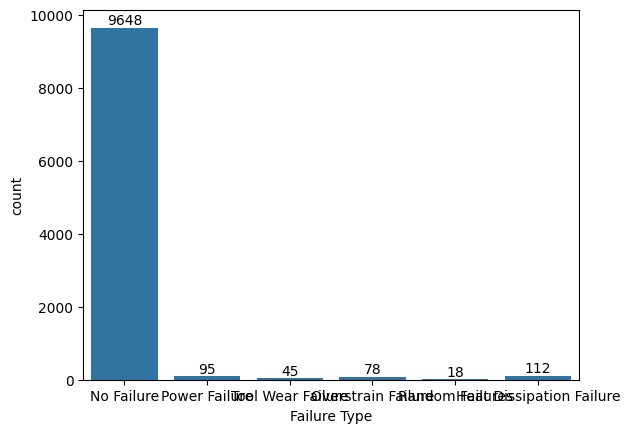

In [62]:
#Bar graph plot
ax = sns.countplot(x = 'Failure Type',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

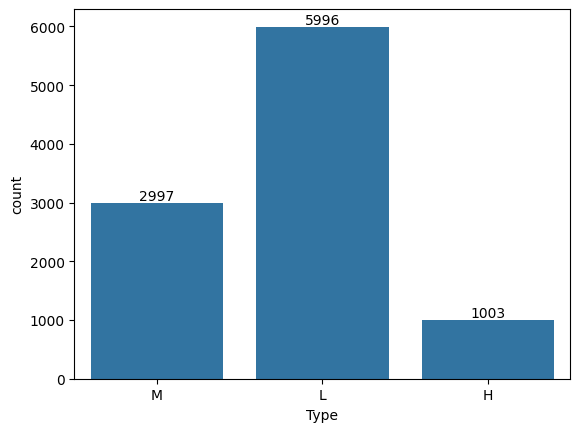

In [63]:
#Bar graph plot
ax = sns.countplot(x = 'Type',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

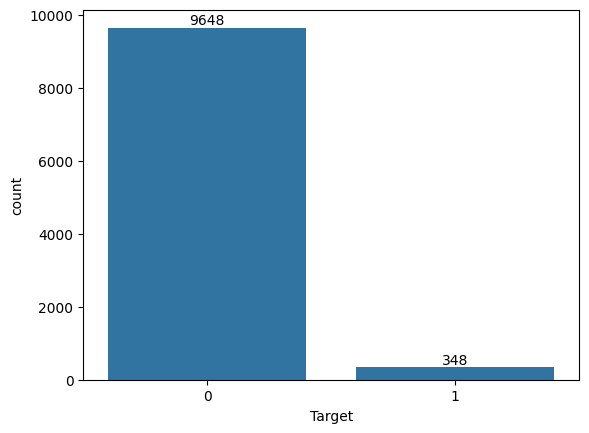

In [64]:
#Bar graph plot
ax = sns.countplot(x = 'Target',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

## TASK 4(Statical Analysis)

In [65]:
df.drop(df.columns[0], axis=1, inplace=True)

In [66]:
df.fillna(method='ffill', inplace=True)

C:\Users\MY\AppData\Local\Temp\ipykernel_5488\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [67]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['Failure Type', 'random_date', 'random_time', 'date_part', 'time_part',
       'date_bin', 'mapped_values'],
      dtype='object')


In [68]:
df = df.drop(categorical_columns, axis=1)

In [69]:
print(df)

      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                  1551.0   
1                   298.1                    308.6                  1425.0   
2                   298.1                    308.6                  1558.0   
3                   298.1                    308.6                  1527.0   
4                   298.3                    308.7                  1667.0   
...                   ...                      ...                     ...   
9991                298.8                    308.4                  1604.0   
9992                298.9                    308.4                  1632.0   
9993                299.0                    308.6                  1645.0   
9994                299.0                    308.7                  1408.0   
9995                299.0                    308.7                  1500.0   

      Torque [Nm]  Tool wear [min]  Target     random_datetime 

In [70]:
# Split the data into features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [73]:
print(X_train.dtypes)

Air temperature [K]               float64
Process temperature [K]           float64
Rotational speed [rpm]            float64
Torque [Nm]                       float64
Tool wear [min]                     int64
random_datetime            datetime64[ns]
year                                int32
month                               int32
day                                 int32
hour                                int32
minute                              int32
second                              int32
dtype: object


In [74]:
print(y_train.dtypes)


int64


In [75]:
print(X_train.isnull().sum())

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
random_datetime            0
year                       0
month                      0
day                        0
hour                       0
minute                     0
second                     0
dtype: int64


In [76]:
print(y_train.isnull().sum())

0


In [77]:
print("\nDimensions of X_train:", X_train.shape)


Dimensions of X_train: (7996, 12)


In [78]:
print("Dimensions of y_train:", y_train.shape)

Dimensions of y_train: (7996,)


In [79]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [80]:
df['random_datetime'] = pd.to_datetime(df['random_datetime'])

In [81]:
bins = pd.date_range(start=df['random_datetime'].min(), end=df['random_datetime'].max(), freq='MS')

In [82]:
print(df)

      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                  1551.0   
1                   298.1                    308.6                  1425.0   
2                   298.1                    308.6                  1558.0   
3                   298.1                    308.6                  1527.0   
4                   298.3                    308.7                  1667.0   
...                   ...                      ...                     ...   
9991                298.8                    308.4                  1604.0   
9992                298.9                    308.4                  1632.0   
9993                299.0                    308.6                  1645.0   
9994                299.0                    308.7                  1408.0   
9995                299.0                    308.7                  1500.0   

      Torque [Nm]  Tool wear [min]  Target     random_datetime 

## MEASURE SPREAD
PERCENTILE

In [83]:

numerical_columns = df.select_dtypes(include=['float64', 'int64'])
percentiles = [0, 0.25, 0.5, 0.75, 1.0]
percentile_values = numerical_columns.quantile(q=percentiles)
print("Percentiles for numerical columns:")
print(percentile_values)

Percentiles for numerical columns:
      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0.00                295.3                    305.7                  1168.0   
0.25                298.3                    308.8                  1423.0   
0.50                300.1                    310.1                  1503.0   
0.75                301.5                    311.1                  1612.0   
1.00                304.5                    313.8                  2886.0   

      Torque [Nm]  Tool wear [min]  Target  
0.00          3.8              0.0     0.0  
0.25         33.2             53.0     0.0  
0.50         40.1            108.0     0.0  
0.75         46.8            162.0     0.0  
1.00         76.6            253.0     1.0  


In [84]:
quartiles = [0, 0.25, 0.5, 0.75, 1.0]
quartile_values = numerical_columns.quantile(q=quartiles)
print("Quartiles for numerical columns:")
print(quartile_values)

Quartiles for numerical columns:
      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0.00                295.3                    305.7                  1168.0   
0.25                298.3                    308.8                  1423.0   
0.50                300.1                    310.1                  1503.0   
0.75                301.5                    311.1                  1612.0   
1.00                304.5                    313.8                  2886.0   

      Torque [Nm]  Tool wear [min]  Target  
0.00          3.8              0.0     0.0  
0.25         33.2             53.0     0.0  
0.50         40.1            108.0     0.0  
0.75         46.8            162.0     0.0  
1.00         76.6            253.0     1.0  


Quintiles

In [85]:
quintiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0] 
quintile_values = numerical_columns.quantile(q=quintiles)
print("Quintiles for numerical columns:")
print(quintile_values)

Quintiles for numerical columns:
     Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0.0                295.3                    305.7                  1168.0   
0.2                298.1                    308.6                  1405.0   
0.4                299.2                    309.6                  1470.0   
0.6                300.6                    310.5                  1541.0   
0.8                301.9                    311.3                  1644.0   
1.0                304.5                    313.8                  2886.0   

     Torque [Nm]  Tool wear [min]  Target  
0.0          3.8              0.0     0.0  
0.2         31.4             42.0     0.0  
0.4         37.5             86.0     0.0  
0.6         42.7            130.0     0.0  
0.8         48.3            174.0     0.0  
1.0         76.6            253.0     1.0  


Deciles

In [86]:
deciles = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
decile_values = numerical_columns.quantile(q=deciles)
print("Deciles for numerical columns:")
print(decile_values)

Deciles for numerical columns:
     Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0.0                295.3                    305.7                  1168.0   
0.1                297.4                    308.1                  1364.0   
0.2                298.1                    308.6                  1405.0   
0.3                298.7                    309.1                  1439.0   
0.4                299.2                    309.6                  1470.0   
0.5                300.1                    310.1                  1503.0   
0.6                300.6                    310.5                  1541.0   
0.7                301.1                    310.9                  1584.0   
0.8                301.9                    311.3                  1644.0   
0.9                302.7                    311.9                  1746.0   
1.0                304.5                    313.8                  2886.0   

     Torque [Nm]  Tool wear [min]  Target  


In [87]:

q1 = numerical_columns.quantile(0.25)
q3 = numerical_columns.quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR) for numerical columns:")
print(iqr)

Interquartile Range (IQR) for numerical columns:
Air temperature [K]          3.2
Process temperature [K]      2.3
Rotational speed [rpm]     189.0
Torque [Nm]                 13.6
Tool wear [min]            109.0
Target                       0.0
dtype: float64


Variance

In [88]:
variance = numerical_columns.var()
print("Variance for numerical columns:")
print(variance)

Variance for numerical columns:
Air temperature [K]            4.001295
Process temperature [K]        2.201582
Rotational speed [rpm]     32150.940968
Torque [Nm]                   99.406533
Tool wear [min]             4049.308587
Target                         0.033605
dtype: float64


Standard Deviation

In [89]:
std_deviation = numerical_columns.std()
print("Standard deviation for numerical columns:")
print(std_deviation)

Standard deviation for numerical columns:
Air temperature [K]          2.000324
Process temperature [K]      1.483773
Rotational speed [rpm]     179.306835
Torque [Nm]                  9.970282
Tool wear [min]             63.634178
Target                       0.183317
dtype: float64


COVARIANCE AND CORRELATION ANALYSIS

In [90]:
covariance_matrix = numerical_columns.cov()
correlation_matrix = numerical_columns.corr()
print("Covariance matrix:")
print(covariance_matrix)

print("\nCorrelation matrix:")
print(correlation_matrix)

Covariance matrix:
                         Air temperature [K]  Process temperature [K]  \
Air temperature [K]                 4.001295                 2.600184   
Process temperature [K]             2.600184                 2.201582   
Rotational speed [rpm]              8.059076                 5.074646   
Torque [Nm]                        -0.271996                -0.205881   
Tool wear [min]                     1.689811                 1.217989   
Target                              0.030948                 0.010813   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
Air temperature [K]                    8.059076    -0.271996         1.689811   
Process temperature [K]                5.074646    -0.205881         1.217989   
Rotational speed [rpm]             32150.940968 -1564.420565        -1.611007   
Torque [Nm]                        -1564.420565    99.406533        -1.804832   
Tool wear [min]                       -1.611007    -1.804832    

INFERENTIAL STATISTICS

In [91]:
from scipy import stats 

In [92]:
print("NULL HYPOTHESIS")
# Assuming significance level (alpha) of 0.05
alpha = 0.05
# Perform Z-test
z_stat, p_value = stats.ttest_ind(numerical_columns.iloc[:, 0], numerical_columns.iloc[:, 1])
if p_value < alpha:
    print("For Z_Test Null hypothesis (H0): The means of two samples are equal")
else:
    print("For Z_Test Null hypothesis (H0): The means of two samples are not equal")

# Perform T-test
t_stat, p_value = stats.ttest_rel(numerical_columns.iloc[:, 0], numerical_columns.iloc[:, 1])
if p_value < alpha:
    print("For T_Test Null hypothesis (H0): There is no significant difference between paired samples")
else:
    print("For T_Test Null hypothesis (H0): There is a significant difference between paired samples")
    

NULL HYPOTHESIS
For Z_Test Null hypothesis (H0): The means of two samples are equal
For T_Test Null hypothesis (H0): There is no significant difference between paired samples


In [93]:
print("ALTERNATIVE HYPOTHESIS")
alpha = 0.05
# Perform Z-test
z_stat, p_value = stats.ttest_ind(numerical_columns.iloc[:, 0], numerical_columns.iloc[:, 1])
if p_value < alpha:
    print("For Z_Test Alternative hypothesis (H1): The means of two samples are not equal")
else:
    print("For Z_Test Alternative hypothesis (H1): The means of two samples are equal")

# Perform T-test
t_stat, p_value = stats.ttest_rel(numerical_columns.iloc[:, 0], numerical_columns.iloc[:, 1])
if p_value < alpha:
    print("For T_Test Alternative hypothesis (H1): There is a significant difference between paired samples")
else:
    print("For T_Test Alternative hypothesis (H1): There is no significant difference between paired samples")

ALTERNATIVE HYPOTHESIS
For Z_Test Alternative hypothesis (H1): The means of two samples are not equal
For T_Test Alternative hypothesis (H1): There is a significant difference between paired samples


In [94]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\MY\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [95]:
import statsmodels.api as sm

In [96]:
# Add a constant term to the independent variable (X) for the intercept
X = sm.add_constant(df['Air temperature [K]'])

# Extract the target variable (Y)
Y = df['Rotational speed [rpm]']

# Create and fit the linear regression model
model = sm.OLS(Y,X).fit()

# Print the model summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Rotational speed [rpm]   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     5.048
Date:                    Fri, 12 Apr 2024   Prob (F-statistic):             0.0247
Time:                            22:45:43   Log-Likelihood:                -66051.
No. Observations:                    9996   AIC:                         1.321e+05
Df Residuals:                        9994   BIC:                         1.321e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [97]:
X = sm.add_constant(df['Process temperature [K]'])
Y = df['Torque [Nm]']
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Torque [Nm]   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.936
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.164
Time:                        22:45:43   Log-Likelihood:                -37169.
No. Observations:                9996   AIC:                         7.434e+04
Df Residuals:                    9994   BIC:                         7.436e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [98]:
X = sm.add_constant(df['Air temperature [K]'])
Y = df['Target']
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     71.70
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           2.86e-17
Time:                        22:45:43   Log-Likelihood:                 2811.1
No. Observations:                9996   AIC:                            -5618.
Df Residuals:                    9994   BIC:                            -5604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.2856    

## TASK 5(Data Visualization)

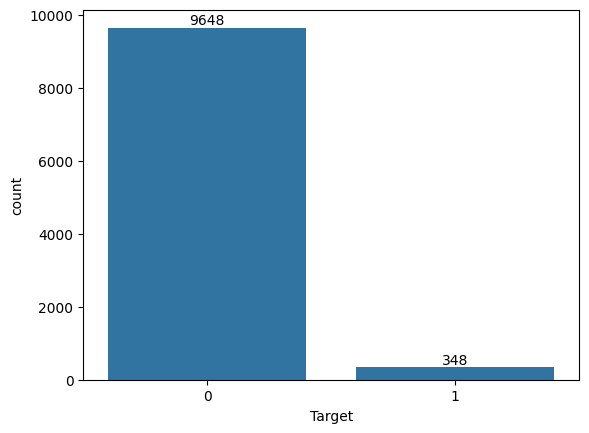

In [99]:
#Bar graph plot
ax = sns.countplot(x = 'Target',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

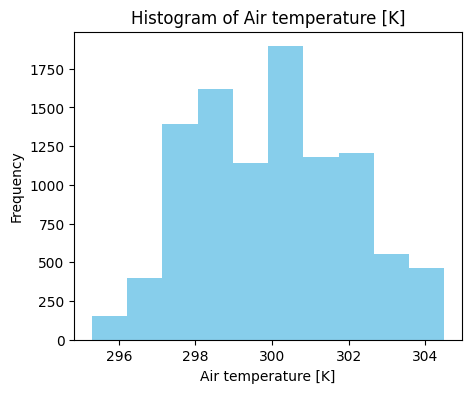

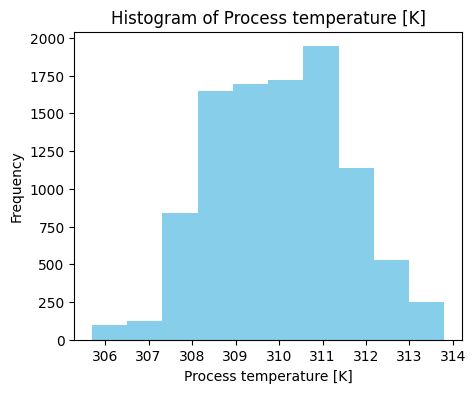

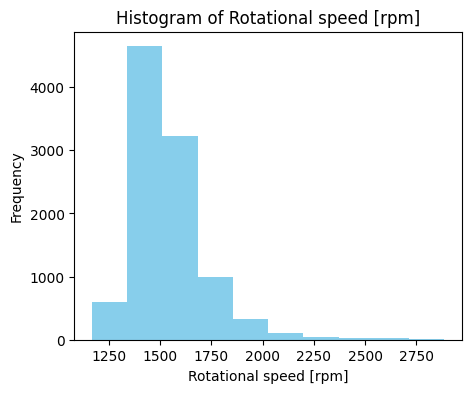

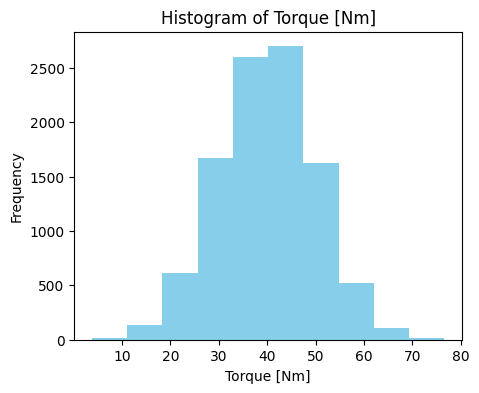

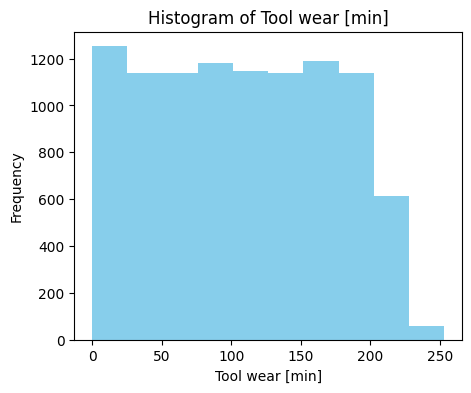

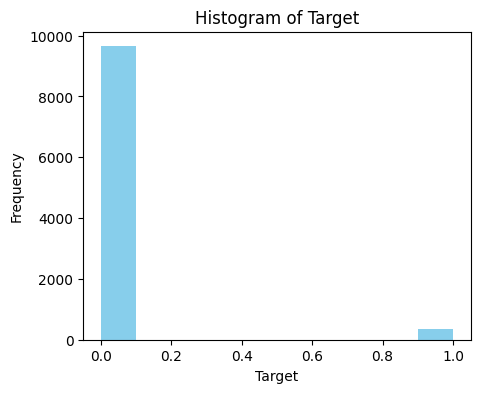

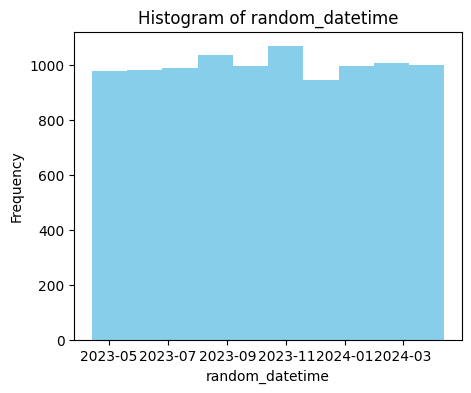

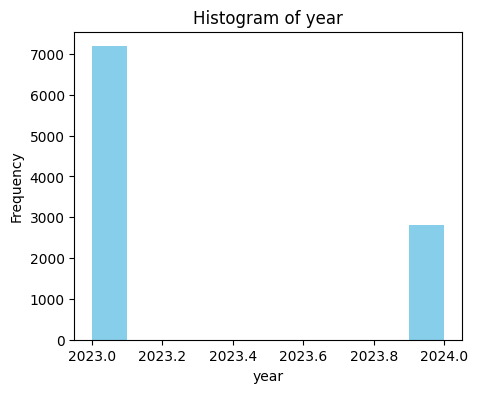

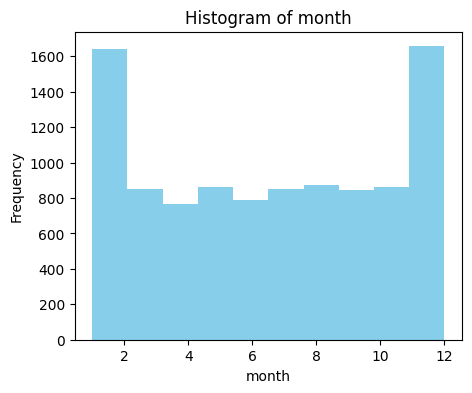

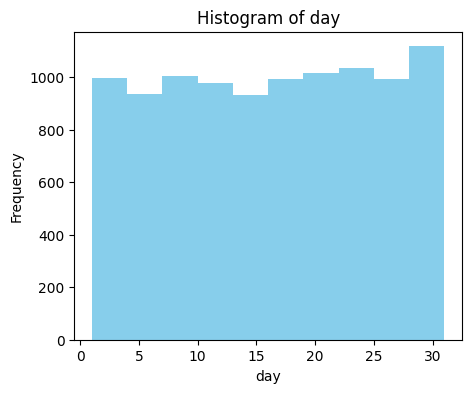

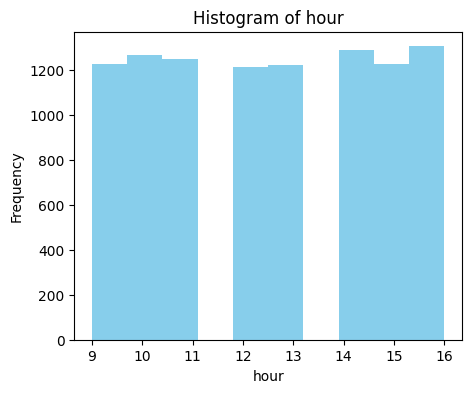

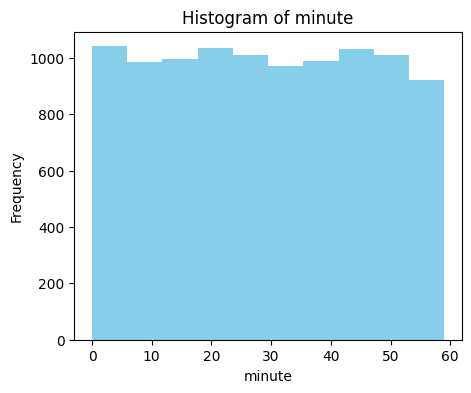

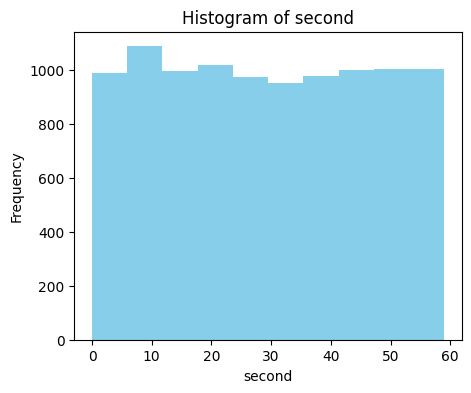

In [100]:
for column in df.columns:
    plt.figure(figsize=(5, 4))
    plt.hist(df[column], color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

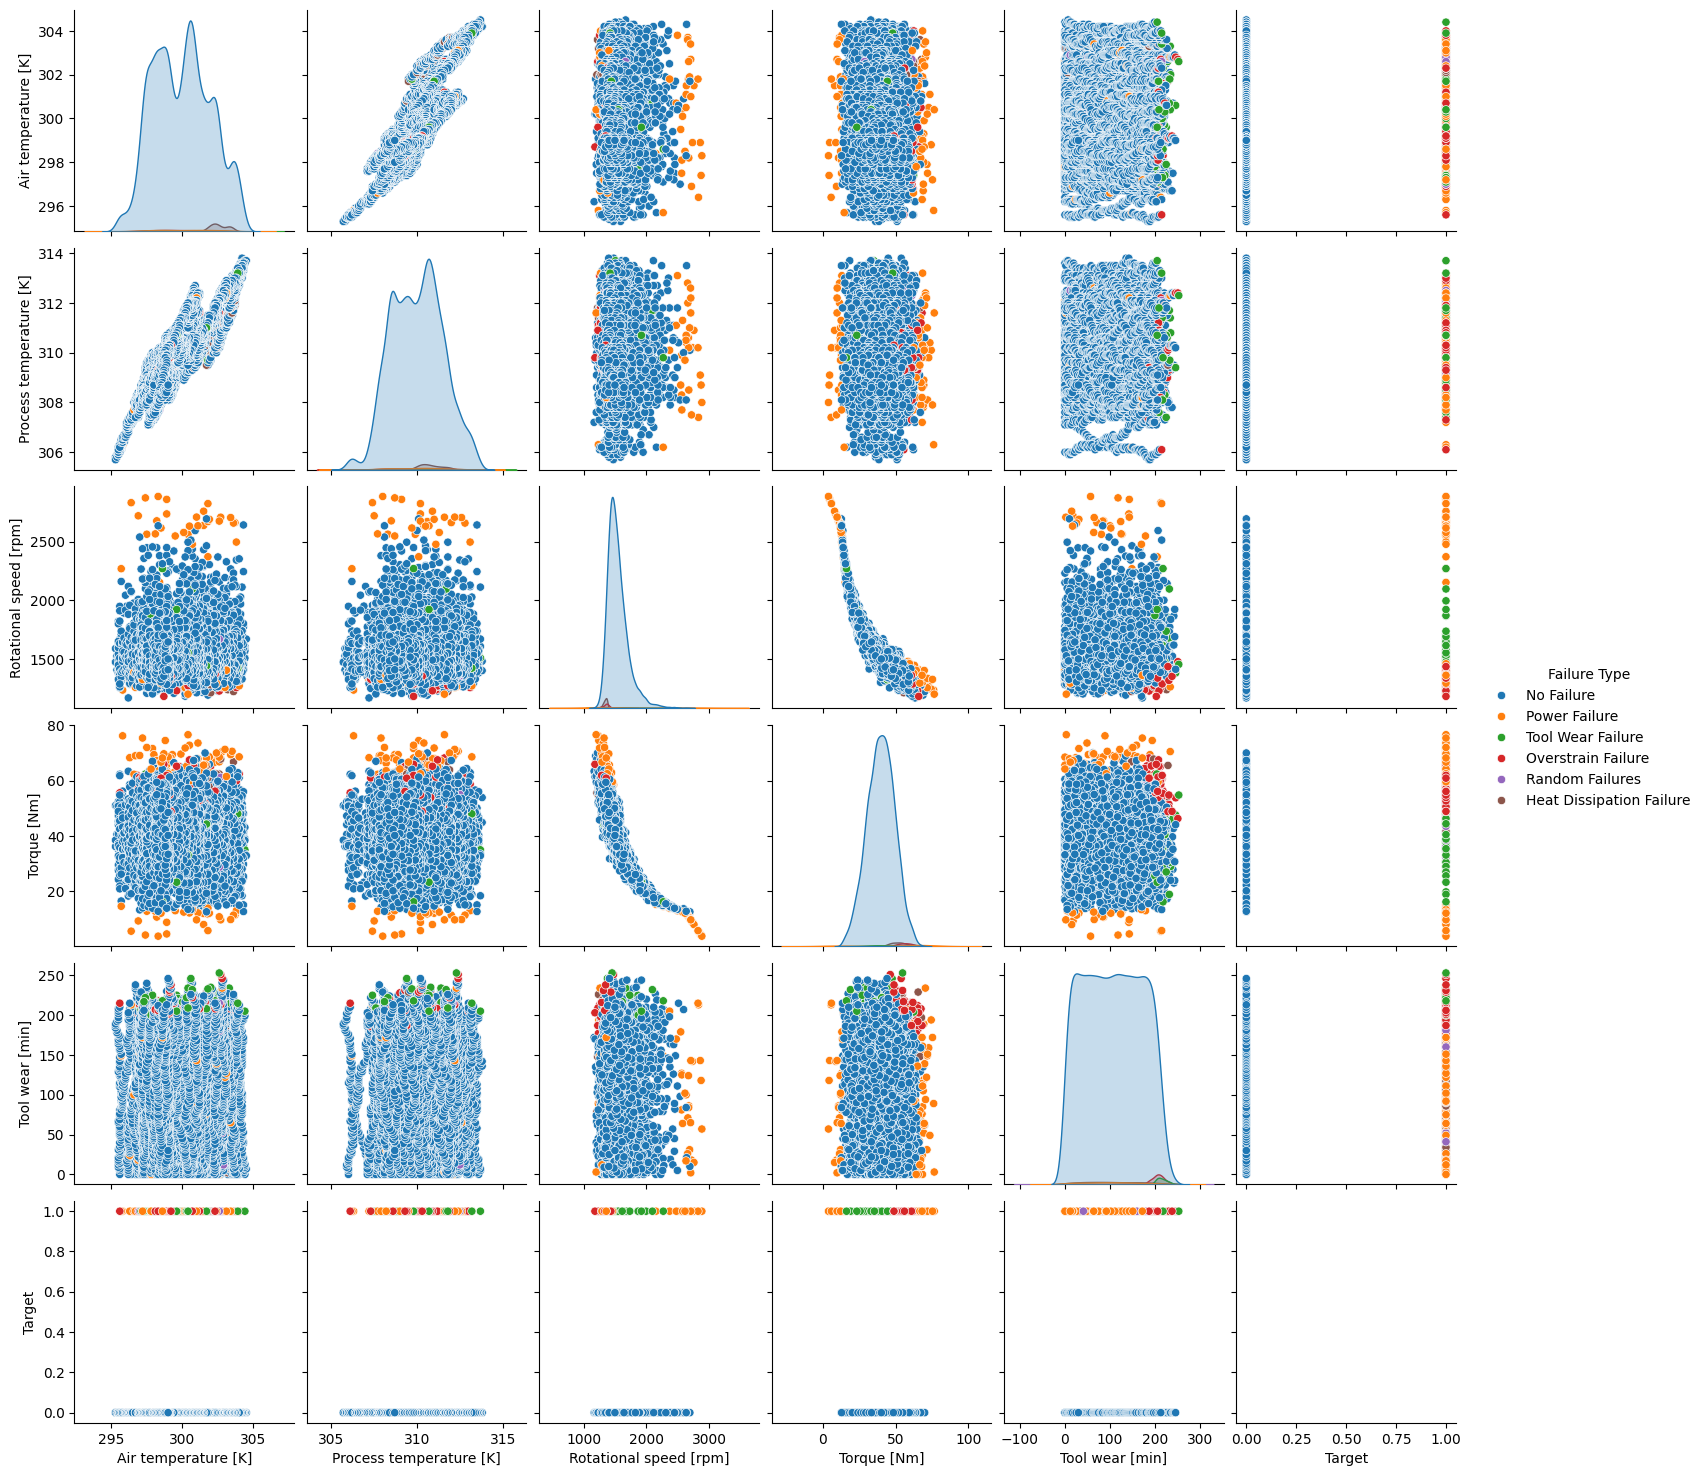

<Figure size 500x400 with 0 Axes>

In [101]:
sns.pairplot(data,hue="Failure Type")
plt.figure(figsize=(5, 4))
plt.show()

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

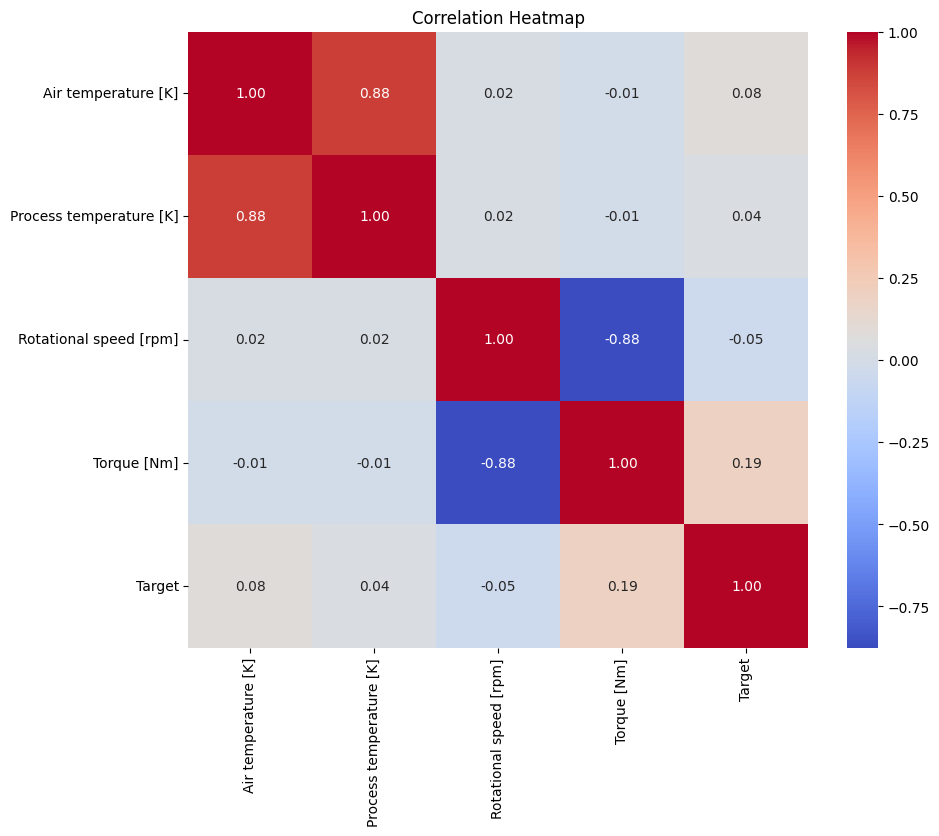

In [103]:
numeric_data = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Target']]

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()